In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## Import data from https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
nyc_tree = pd.read_csv('data/2015_Street_Tree_Census_-_Tree_Data.csv')

In [3]:
nyc_tree.sample(7)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
41028,211432,515481,09/09/2015,9,0,OnCurb,Alive,Fair,Acer platanoides,Norway maple,...,2044400,New York,40.901921,-73.844734,1.027172e+06,267910.1942,12.0,444.0,2071442.0,2.050960e+09
635205,115108,301968,08/03/2015,3,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,...,4012301,New York,40.774797,-73.897105,1.012749e+06,221572.9962,22.0,12301.0,4441806.0,4.007740e+09
354947,578755,412407,06/08/2016,18,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,5020801,New York,40.542523,-74.208421,9.263223e+05,137001.3586,51.0,20801.0,5085754.0,5.070260e+09
658151,136682,415405,08/11/2015,13,0,OnCurb,Alive,Fair,Acer saccharinum,silver maple,...,5013800,New York,40.567289,-74.129949,9.481459e+05,145981.8108,50.0,138.0,5059887.0,5.043700e+09
565674,49140,414917,07/05/2015,4,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5013204,New York,40.559836,-74.121656,9.504463e+05,143263.3805,50.0,13204.0,5164119.0,5.046720e+09
215464,412035,330471,11/01/2015,15,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,4066400,New York,40.649977,-73.736206,1.057450e+06,176190.6385,31.0,664.0,4290171.0,4.136570e+09
191436,394250,412597,10/28/2015,9,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,5017011,New York,40.542144,-74.168448,9.374321e+05,136839.3179,51.0,17011.0,5130671.0,5.055930e+09


In [4]:
nyc_tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [5]:
## Reorder columns making target variable 'health' the first
column_headers = list(nyc_tree.columns)
column_headers = [column_headers[7]] + column_headers[:7] + column_headers[8:]
nyc_tree = nyc_tree[column_headers]

In [6]:
nyc_tree_eda = nyc_tree
nyc_tree_eda.to_csv('data/nyc_tree_eda.csv', index=False)

In [7]:
def two_category_binarizer(first_option, series):
    nyc_tree[series] = nyc_tree[series].apply(lambda x: 1 if x==first_option else 0)

#### Column 2 of 45<br>&emsp;tree_id

In [8]:
len(nyc_tree[nyc_tree.duplicated(subset='tree_id', keep=False)]) == 0

True

In [9]:
## After determining there are no duplicated tree ids this column is no longer necessary
nyc_tree.drop('tree_id', axis=1, inplace=True)

#### Column 3 of 45<br>&emsp;block_id

In [10]:
## Drop block_id for now; too many unique values

In [11]:
nyc_tree.drop('block_id', axis=1, inplace=True)

#### Column 4 of 45<br>&emsp;created_at

In [12]:
nyc_tree.drop('created_at', axis=1, inplace=True)

#### Column 5 of 45<br>&emsp;tree_dbh

In [13]:
nyc_tree.tree_dbh.value_counts(dropna=False)

4      60372
3      54454
2      41977
5      41642
11     37978
       ...  
75         1
151        1
154        1
159        1
450        1
Name: tree_dbh, Length: 146, dtype: int64

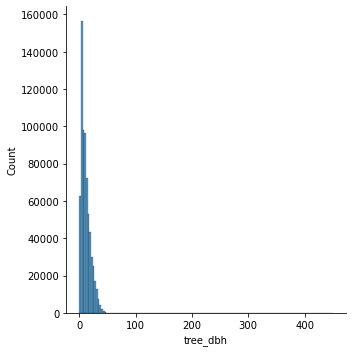

In [14]:
sns.displot(nyc_tree.tree_dbh, bins=150);

In [15]:
nyc_tree.loc[nyc_tree.status == 'Alive'].tree_dbh.describe()

count    652173.000000
mean         11.709485
std           8.634239
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

In [16]:
svnty_fv_per = np.percentile(nyc_tree.loc[nyc_tree.status == 'Alive'].tree_dbh, 75)
twnty_fv_per = np.percentile(nyc_tree.loc[nyc_tree.status == 'Alive'].tree_dbh, 25)
alive_tree_diameter_iqr = svnty_fv_per - twnty_fv_per

In [17]:
nyc_tree.drop(nyc_tree.loc[nyc_tree.status == 'Alive'].loc[(nyc_tree.tree_dbh < (twnty_fv_per - 1.5*alive_tree_diameter_iqr))
                                    | (nyc_tree.tree_dbh > (svnty_fv_per + 1.5*alive_tree_diameter_iqr))].index, inplace=True)

In [18]:
nyc_tree.loc[nyc_tree.status == 'Alive'].tree_dbh.describe()

count    636794.000000
mean         11.080827
std           7.501970
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max          32.000000
Name: tree_dbh, dtype: float64

#### Column 6 of 45<br>&emsp;stump_diam

In [19]:
nyc_tree.loc[nyc_tree.stump_diam > 0].shape

(17654, 42)

In [20]:
nyc_tree.status.value_counts(dropna=False)

Alive    636794
Stump     17654
Dead      13961
Name: status, dtype: int64

In [21]:
nyc_tree.health.value_counts(dropna=False)

Good    514974
Fair     95200
NaN      31616
Poor     26619
Name: health, dtype: int64

In [22]:
## Drop stump_diam column now and stumps later when addressing status column
nyc_tree.drop('stump_diam', axis=1, inplace=True)

#### Column 7 of 45<br>&emsp;curb_loc

In [23]:
nyc_tree.curb_loc.value_counts(dropna=False)

OnCurb            642475
OffsetFromCurb     25934
Name: curb_loc, dtype: int64

In [24]:
nyc_tree.rename({'curb_loc': 'on_curb'}, axis=1, inplace=True)
two_category_binarizer('OnCurb', 'on_curb')

#### Column 8 of 45<br>&emsp;status

In [25]:
nyc_tree.status.value_counts()

Alive    636794
Stump     17654
Dead      13961
Name: status, dtype: int64

In [26]:
nyc_tree.drop(nyc_tree.loc[nyc_tree.status != 'Alive'].index, inplace=True)

In [27]:
nyc_tree.shape

(636794, 41)

In [28]:
## Address one row still missing value for health
nyc_tree.drop(nyc_tree.loc[nyc_tree.health.isna() == True].index, inplace=True)

In [29]:
nyc_tree.drop('status', axis=1, inplace=True)

<div class="alert alert-block alert-info">
Column 9 of 45<br>&emsp;spc_latin needs adjusting
</div>

In [30]:
nyc_tree.spc_latin.value_counts(dropna=False)

Platanus x acerifolia                 79028
Gleditsia triacanthos var. inermis    64210
Pyrus calleryana                      58896
Quercus palustris                     50041
Acer platanoides                      34032
                                      ...  
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
NaN                                       4
Name: spc_latin, Length: 133, dtype: int64

In [31]:
## Temporarily drop 'spc_latin' column
nyc_tree.drop('spc_latin', axis=1, inplace=True)

#### Column 10 of 45<br>&emsp;spc_common

In [32]:
nyc_tree.spc_common.value_counts(dropna=False)

London planetree    79028
honeylocust         64210
Callery pear        58896
pin oak             50041
Norway maple        34032
                    ...  
pitch pine             33
Osage-orange           29
Scots pine             25
Virginia pine          10
NaN                     4
Name: spc_common, Length: 133, dtype: int64

In [33]:
nyc_tree.drop('spc_common', axis=1, inplace=True)

#### Column 11 of 45<br>&emsp;steward

In [34]:
nyc_tree.steward.value_counts(dropna=False)

None       473821
1or2       142314
3or4        19061
4orMore      1597
Name: steward, dtype: int64

In [35]:
#for value in

#### Column 12 of 45<br>&emsp;guards

In [36]:
nyc_tree.guards.value_counts(dropna=False)

None       557419
Helpful     51568
Harmful     20140
Unsure       7665
NaN             1
Name: guards, dtype: int64

#### Column 13 of 45<br>&emsp;sidewalk

In [37]:
nyc_tree.sidewalk.value_counts(dropna=False)

NoDamage    457121
Damage      179671
NaN              1
Name: sidewalk, dtype: int64

In [38]:
nyc_tree.health = nyc_tree.health.apply(lambda x: 2 if x=='Good' else (1 if x=='Fair' else 0))

In [39]:
## temporary data shrinkage
nyc_tree_mini = nyc_tree[['health', 'tree_dbh', 'on_curb', 'steward', 'guards']].sample(500)
nyc_tree_cleaned = nyc_tree.iloc[:, :5]

In [40]:
nyc_tree_mini.to_csv('data/nyc_tree_mini.csv', index=False)
nyc_tree_cleaned.to_csv('data/nyc_tree_cleaned.csv', index=False)